   Model  Category   Pre Alg  Post Alg  improvement%
0     E5  abstract  0.455200  0.488889      7.400819
1     E5      mean  0.365019  0.400309      9.667948
2     E5       LLM  0.435288  0.486060     11.663905
3  MPNet  abstract  0.448524  0.457624      2.028895
4  MPNet      mean  0.409436  0.444564      8.579709
5  MPNet       LLM  0.464613  0.506376      8.988776


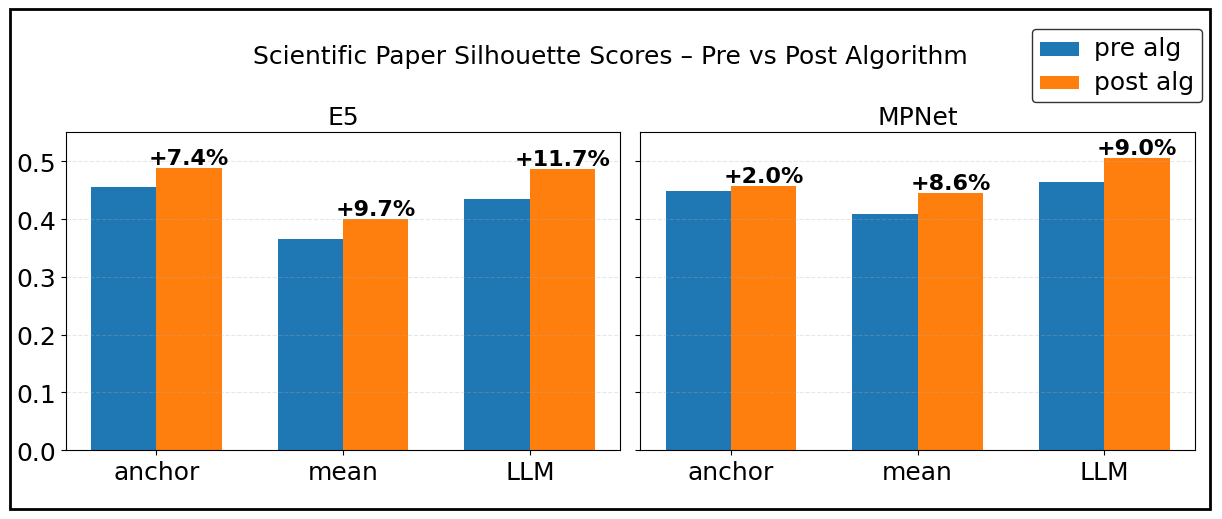

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
def load_fig(fig_path):
    with open(fig_path, 'rb') as f:
        fig = pickle.load(f)
    return fig

import pickle
from IPython.display import display

with open('YOUR/SIL/BAR/PLOT/PATH', 'rb') as fh:
    f = pickle.load(fh)

# sanity check: should be 2 axes
# print(len(f.axes))        # expect: 2
def grouped_bar_df(fig):
    rows = []
    for ax in fig.axes:
        model = ax.get_title()
        cats  = [t.get_text() for t in ax.get_xticklabels()]

        # Get the two bar groups in draw order: [pre, post]
        bar_cons = [c for c in ax.containers if isinstance(c, mpl.container.BarContainer)]
        assert len(bar_cons) == 2, f"Expected 2 bar groups, got {len(bar_cons)}"

        pre  = [r.get_height() for r in bar_cons[0].patches]
        post = [r.get_height() for r in bar_cons[1].patches]

        for cat, a, b in zip(cats, pre, post):
            rows.append({"Model": model, "Category": cat, "Pre Alg": a, "Post Alg": b})
    return pd.DataFrame(rows)
df = grouped_bar_df(f)
df['improvement%'] = 100 * (df['Post Alg'] - df['Pre Alg']) / df['Pre Alg']
print(df)


def add_improvement_labels(fig, df):
    for ax in fig.axes:
        model = ax.get_title()
        cats  = [t.get_text() for t in ax.get_xticklabels()]
        
        # containers: [pre, post]
        bar_cons = [c for c in ax.containers if isinstance(c, mpl.container.BarContainer)]
        post_bars = bar_cons[1].patches

        # slice the df for this subplot
        subdf = df[df["Model"] == model].set_index("Category")

        for bar, cat in zip(post_bars, cats):
            val = subdf.loc[cat, "improvement%"]
            sign = "+" if val >= 0 else ""
            label = f"{sign}{val:.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                label,
                ha="center", va="bottom",
                fontsize=10, fontweight="bold"
            )
add_improvement_labels(f, df)
def set_all_fonts(fig, size=18):
    # Axes titles, labels, ticks
    for ax in fig.axes:
        ax.title.set_fontsize(size)
        ax.xaxis.label.set_fontsize(size)
        ax.yaxis.label.set_fontsize(size)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontsize(size)

        # bar-annotation labels
        for txt in ax.texts:
            txt.set_fontsize(16)

    # Suptitle
    if fig._suptitle is not None:
        fig._suptitle.set_fontsize(size)

    # Legends
    for leg in fig.legends:
        for text in leg.get_texts():
            text.set_fontsize(size)

set_all_fonts(f, size=18)
for ax in f.axes:
    ax.set_ylim(0, 0.55)  # Set y-axis limits to [0, 0.55]
    ax.set_xticklabels(['anchor', 'mean', 'LLM'])

for leg in f.legends:
    leg.set_bbox_to_anchor((1.01, 1))  # keep x < 1.0 to stay inside the black rectangle
    # leg._loc = 2  # 'upper right'
display(f)   


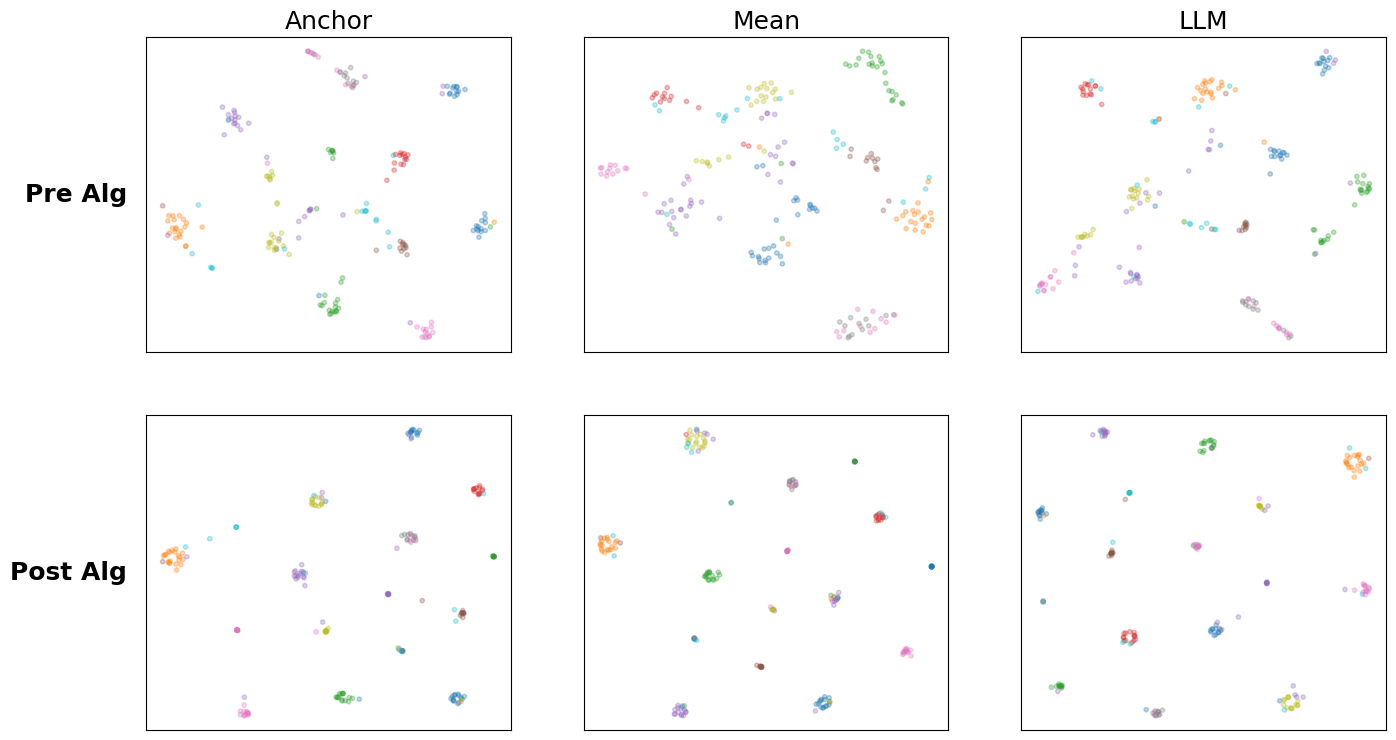

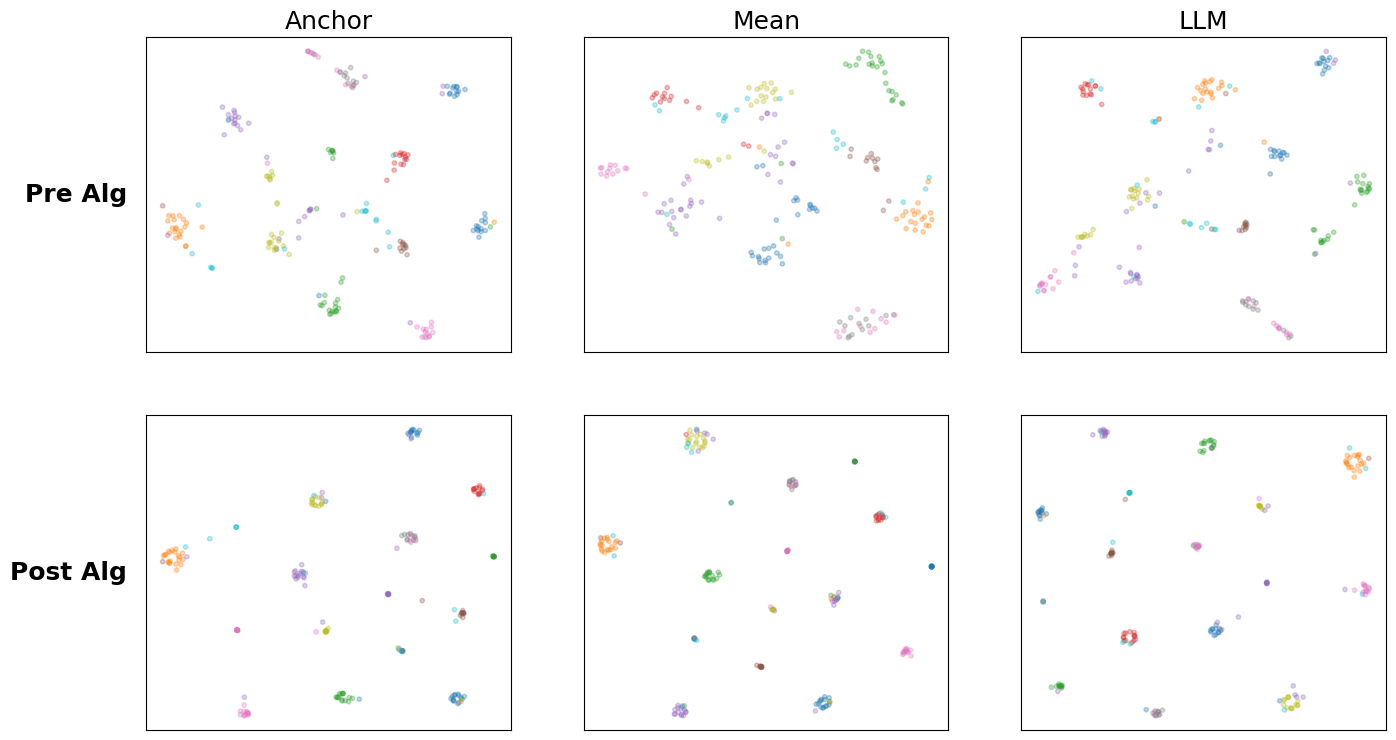

In [ ]:
with open('YOUR/TSNE/PLOT/PATH', 'rb') as fh:
    f2 = pickle.load(fh)
set_all_fonts(f2, size=18)
# import re

def clean_tsne_titles_and_add_row_labels(fig, col_titles=("Abstract", "Mean", "LLM"), fontsize=18, pad=0.012):
    axes = fig.axes
    assert len(axes) == 6, "Expected a 2x3 grid"

    # 1) Set column titles (top row) to the desired names
    for j, t in enumerate(col_titles):
        axes[j].set_title(t, fontsize=fontsize)

    # 2) Remove titles on the bottom row entirely
    for j in range(3, 6):
        axes[j].set_title("")

    # 3) Place bold 'Pre' and 'Post' OUTSIDE the left of the subplot grid
    fig.canvas.draw()  # ensure positions are up to date
    tl = axes[0].get_position()  # top-left axes bbox in figure coords
    bl = axes[3].get_position()  # bottom-left axes bbox

    x = tl.x0 - pad
    y_pre  = (tl.y0 + tl.y1) / 2
    y_post = (bl.y0 + bl.y1) / 2

    fig.text(x, y_pre,  "Pre Alg",  ha="right", va="center",
             fontweight="bold", fontsize=fontsize, transform=fig.transFigure)
    fig.text(x, y_post, "Post Alg", ha="right", va="center",
             fontweight="bold", fontsize=fontsize, transform=fig.transFigure)

# apply
clean_tsne_titles_and_add_row_labels(f2, col_titles=("Anchor","Mean","LLM"), fontsize=18, pad=0.012)
display(f2)

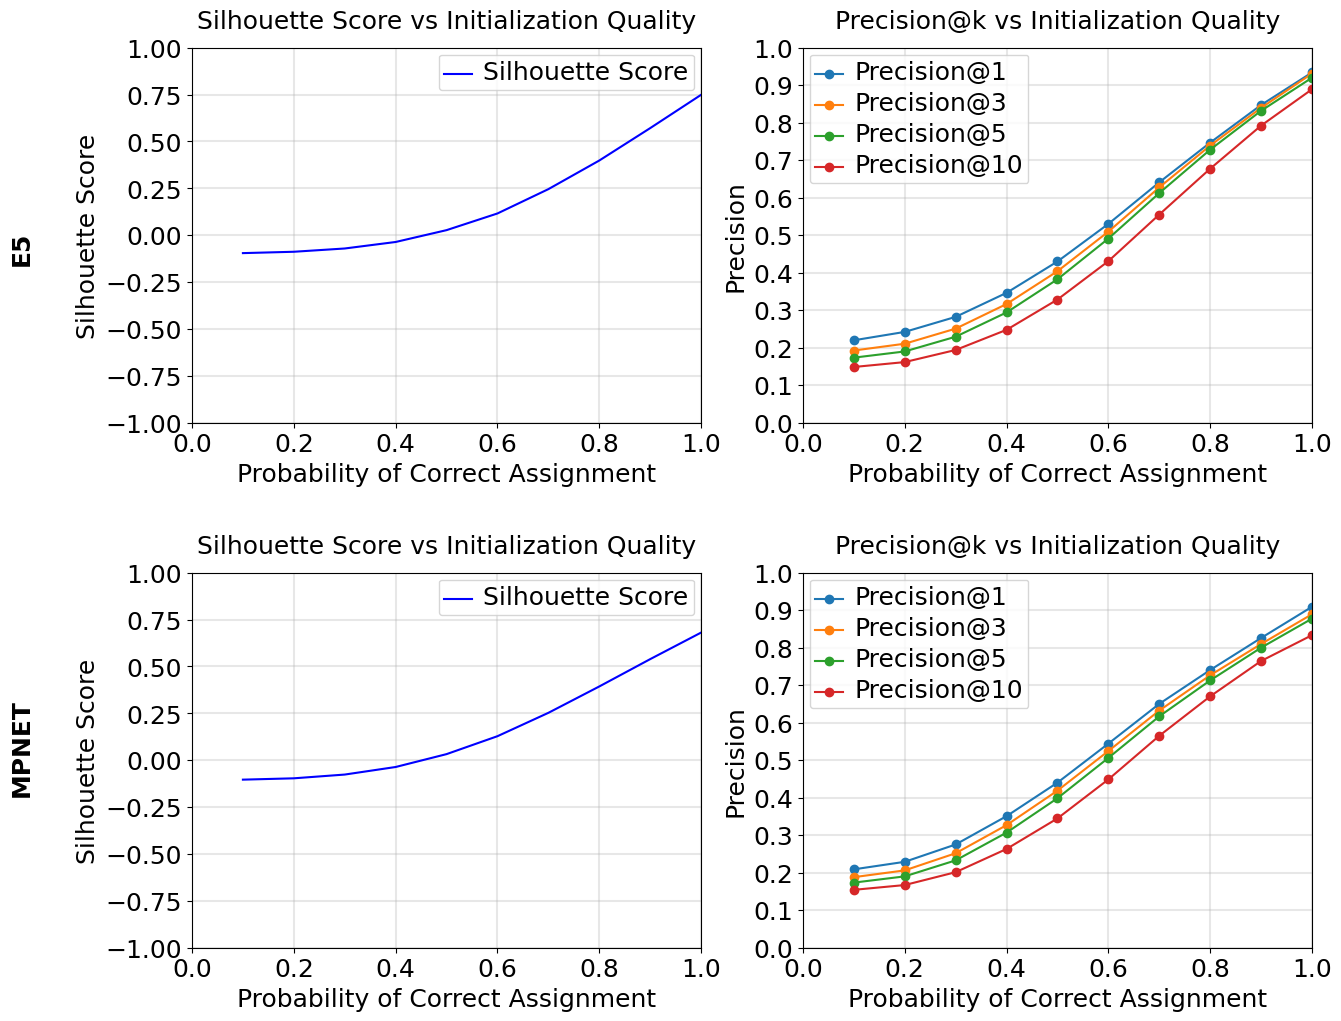

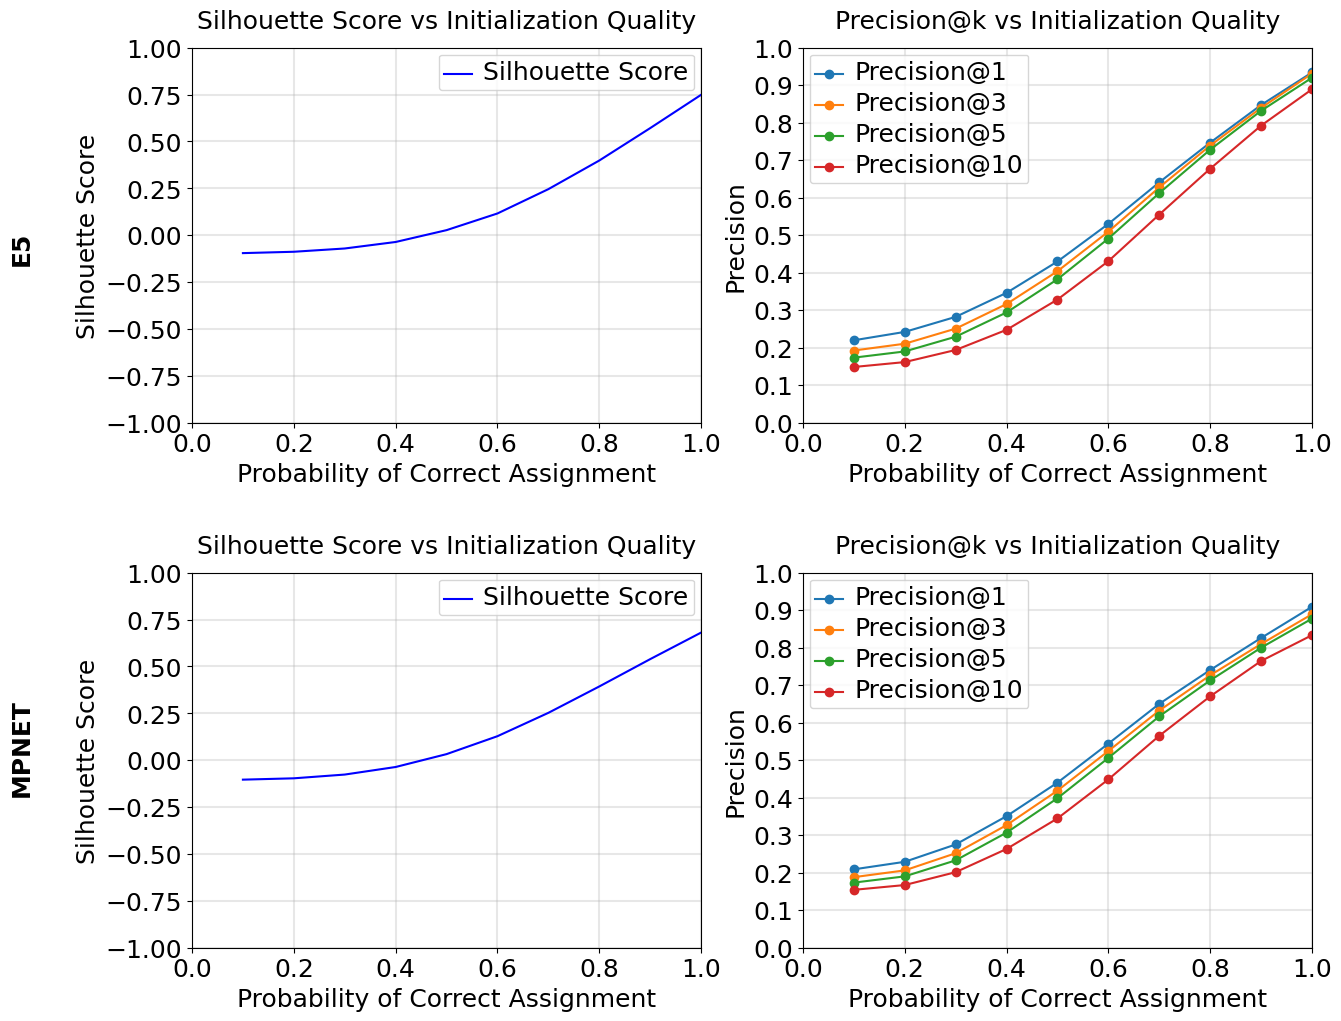

In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display

def create_2x2_with_gridspec(fig1, fig2, row_titles=None, figsize=(14, 10)):
    """More elegant approach using gridspec for better layout control"""
    
    # Create figure with gridspec
    combined_fig = plt.figure(figsize=figsize)
    
    if row_titles:
        # Create gridspec with more space for row labels
        gs = gridspec.GridSpec(2, 2, figure=combined_fig, 
                              left=0.15, right=0.95, top=0.95, bottom=0.05,
                              hspace=0.4, wspace=0.2)
    else:
        gs = gridspec.GridSpec(2, 2, figure=combined_fig,
                              hspace=0.4, wspace=0.2)
    
    # Create subplots
    ax1 = combined_fig.add_subplot(gs[0, 0])
    ax2 = combined_fig.add_subplot(gs[0, 1])
    ax3 = combined_fig.add_subplot(gs[1, 0])
    ax4 = combined_fig.add_subplot(gs[1, 1])
    
    target_axes = [ax1, ax2, ax3, ax4]
    source_axes = list(fig1.axes[:2]) + list(fig2.axes[:2])
    
    # Copy content from source to target axes
    for src_ax, dst_ax in zip(source_axes, target_axes):
        # Copy plot data more reliably
        dst_ax.clear()
        
        # Copy lines
        for line in src_ax.get_lines():
            dst_ax.plot(line.get_xdata(), line.get_ydata(), 
                       color=line.get_color(), linewidth=line.get_linewidth(),
                       linestyle=line.get_linestyle(), marker=line.get_marker(),
                       markersize=line.get_markersize(), label=line.get_label())
        
        # Copy bars if any
        for patch in src_ax.patches:
            if hasattr(patch, 'get_height'):  # Bar patch
                dst_ax.add_patch(patch)
        
        # Copy collections (scatter plots, etc.)
        for collection in src_ax.collections:
            dst_ax.add_collection(collection)
        
        # Copy properties and add thicker gridlines
        dst_ax.set_xlim(src_ax.get_xlim())
        dst_ax.set_ylim(src_ax.get_ylim())
        dst_ax.set_xlabel(src_ax.get_xlabel())
        dst_ax.set_ylabel(src_ax.get_ylabel())
        dst_ax.set_title(src_ax.get_title(), pad=14)
        
        # Copy ticks and grid settings from source
        dst_ax.set_xticks(src_ax.get_xticks())
        dst_ax.set_yticks(src_ax.get_yticks())
        
        # Force thicker gridlines on
        dst_ax.grid(True, alpha=0.3, linestyle='-', linewidth=1.5)
        dst_ax.set_axisbelow(True)  # Put grid behind data
        
        # Copy legend if exists
        legend = src_ax.get_legend()
        if legend:
            dst_ax.legend()
    
    # Add row titles with proper spacing to avoid y-axis interference
    if row_titles:
        # Position row titles further left to avoid overlap with y-axis labels
        combined_fig.text(0.02, 0.75, row_titles[0], rotation=90, 
                         verticalalignment='center', fontsize=18, fontweight='bold',
                         transform=combined_fig.transFigure)
        combined_fig.text(0.02, 0.25, row_titles[1], rotation=90, 
                         verticalalignment='center', fontsize=18, fontweight='bold',
                         transform=combined_fig.transFigure)
    
    return combined_fig

# Load and prepare your figures (don't display them)
with open('YOUR/DOWNSTREAM/APP/PLOT/FOR/MODEL/A/PATH', 'rb') as f:
    fig1 = pickle.load(f)

fig1.axes[2].remove()
for ax in fig1.axes:
    ax.set_title(ax.get_title(), pad=14)

with open('YOUR/DOWNSTREAM/APP/PLOT/FOR/MODEL/B/PATH', 'rb') as f:
    fig2 = pickle.load(f)

fig2.axes[2].remove()
for ax in fig2.axes:
    ax.set_title(ax.get_title(), pad=14)

# Use the gridspec approach with thicker gridlines
row_titles = ['E5', 'MPNET']
combined_figure = create_2x2_with_gridspec(fig1, fig2, row_titles=row_titles)

# Close original figures to prevent them from displaying
plt.close(fig1)
plt.close(fig2)

# Apply font settings to combined figure
size = 18
for ax in combined_figure.axes:
    ax.set_xlim(0, 1)  # Set x-axis limits to [0, 1]
    ax.title.set_fontsize(size)
    ax.xaxis.label.set_fontsize(size)
    ax.yaxis.label.set_fontsize(size)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(size)

    # bar-annotation labels
    for txt in ax.texts:
        txt.set_fontsize(16)
    
    # Fix legend font size - iterate through each axis's legend
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(size)

# Suptitle
if combined_figure._suptitle is not None:
    combined_figure._suptitle.set_fontsize(size)

# Display only the final combined figure
display(combined_figure)

# Optionally save the combined figure
# combined_figure.savefig('combined_2x2_figure.png', dpi=300, bbox_inches='tight')

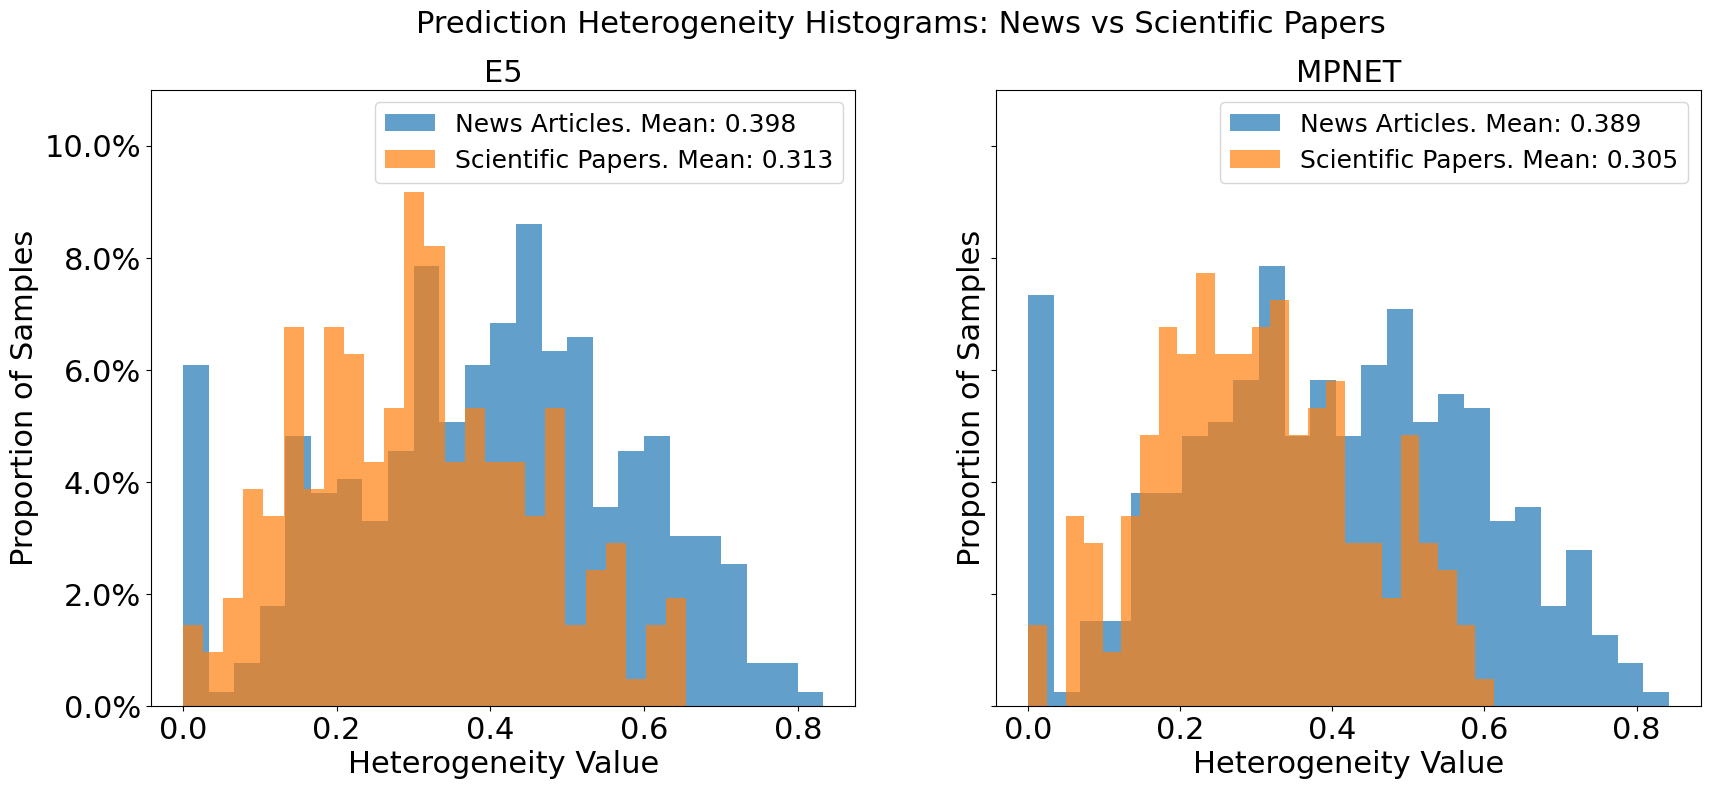

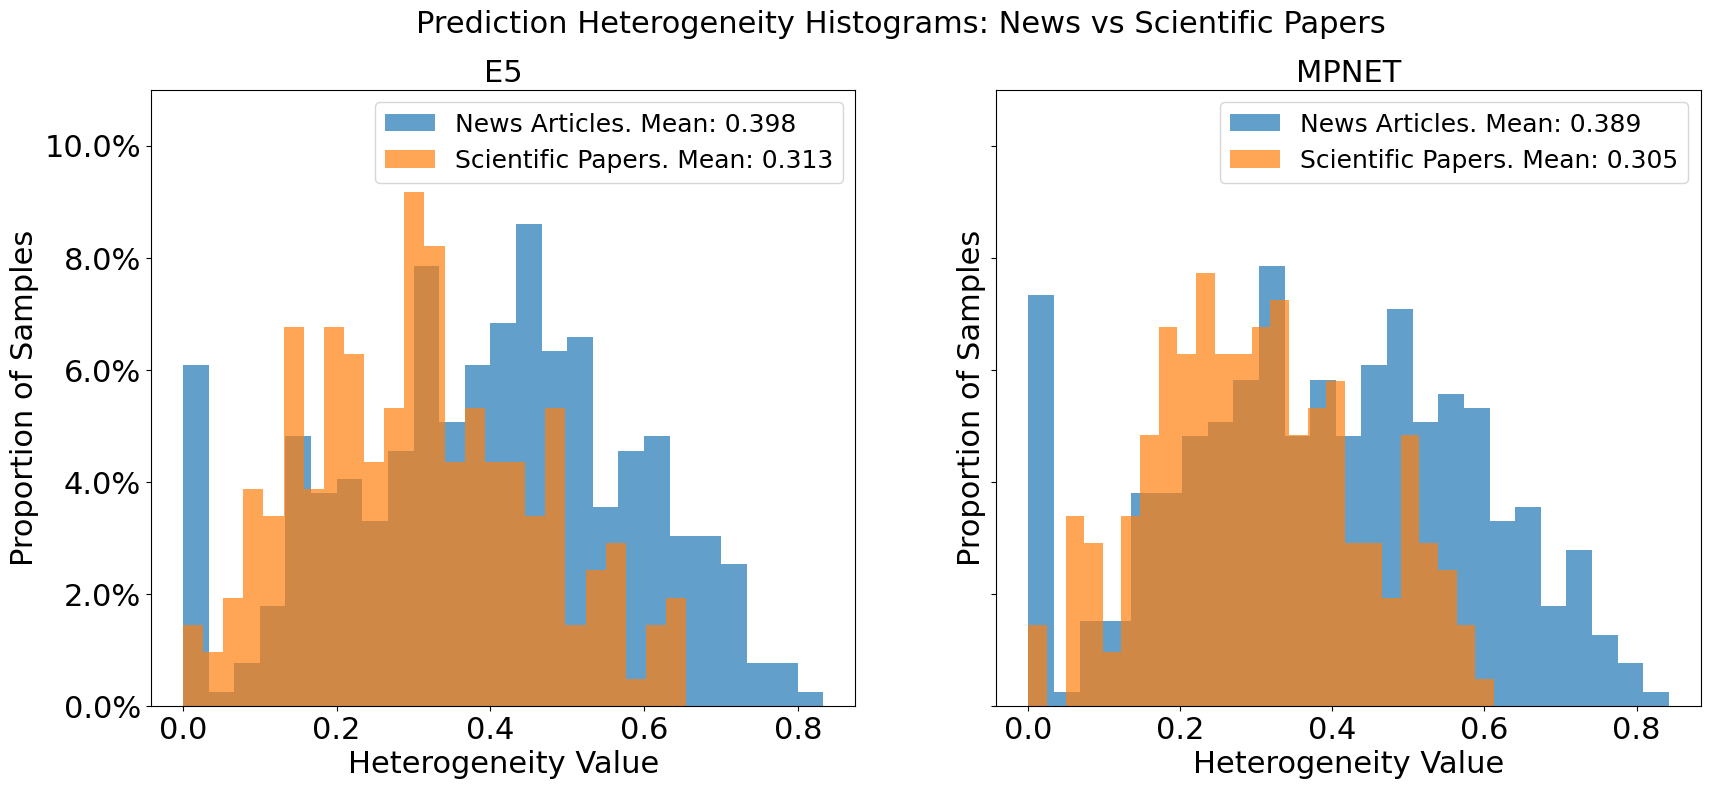

In [6]:
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
with open('/lv_local/home/noam.zel/context_dependant_matching_project/fig_pkl_files/news_vs_sci_papers_prediction_heterogenity.pkl', 'rb') as fh:
    f3 = pickle.load(fh)
# set_all_fonts(f3, size=18)
for ax in f3.axes:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    ax.set_ylim(0, .11)  # Set y-axis limits to [0, 1]
set_all_fonts(f3, size=22)
display(f3)